In [47]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [48]:
all_df = pd.read_csv("titanic.csv")

In [49]:
cols=['survived','pclass' ,'sex', 'age',
       'fare',]
df=all_df[cols]
df.isnull().sum()
df=df.values

In [50]:
X = df[:,1:]
Y = df[:,0]
X[:5]

array([[  1.    ,   0.    ,  29.    , 211.3375],
       [  1.    ,   1.    ,   0.9167, 151.55  ],
       [  1.    ,   0.    ,   2.    , 151.55  ],
       [  1.    ,   1.    ,  30.    , 151.55  ],
       [  1.    ,   0.    ,  25.    , 151.55  ]])

In [51]:
 X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

1046

In [52]:
train_Features[355:359]

array([[ 0.84246649, -1.34419751,  0.8216082 , -0.46039806],
       [ 0.84246649, -1.34419751,  0.09991351, -0.19415727],
       [ 0.84246649,  0.74393829, -0.18876436, -0.49092056],
       [-0.35140802, -1.34419751,  0.17208298, -0.23764487]])

In [53]:
train_Label[:4]

array([1., 0., 0., 0.])

In [54]:
test_Features.shape

(262, 4)

In [55]:
test_Label.shape

(262,)

In [56]:
train_Features.shape

(1046, 4)

In [57]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [58]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [59]:
train_Features.shape

(1046, 4, 1)

In [60]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [61]:
model = Sequential()

In [62]:
model.add(Conv1D(filters=12*10,
                 kernel_size=1,
                 padding='valid',
                 input_shape=(4,1), 
                 activation='relu'))

In [63]:
model.add(MaxPooling1D(pool_size=1))

In [64]:
model.add(Conv1D(filters=12*9,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [65]:
model.add(MaxPooling1D(pool_size=1))

In [66]:
model.add(Conv1D(filters=12*8,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [67]:
model.add(MaxPooling1D(pool_size=1))

In [68]:
model.add(Conv1D(filters=12*7,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [69]:
model.add(MaxPooling1D(pool_size=1))

In [70]:
model.add(Conv1D(filters=12*6,
                 kernel_size=1,
                 padding='valid', 
                 activation='relu'))

In [71]:
model.add(MaxPooling1D(pool_size=1))

In [72]:
model.add(Conv1D(filters=12*5,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [73]:
model.add(MaxPooling1D(pool_size=1))

In [74]:
model.add(Conv1D(filters=12*4,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [75]:
model.add(MaxPooling1D(pool_size=1))

In [76]:
model.add(Conv1D(filters=12*3,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [77]:
model.add(MaxPooling1D(pool_size=1))

In [78]:
model.add(Conv1D(filters=12*2,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [79]:
model.add(MaxPooling1D(pool_size=1))

In [80]:
model.add(Conv1D(filters=12,
                 kernel_size=1,
                 padding='valid',
                 activation='relu'))

In [81]:
model.add(MaxPooling1D(pool_size=1))

In [82]:
model.add(Flatten())

In [83]:
model.add(Dense(4, activation='tanh'))

In [84]:
model.add(Dense(1,activation='sigmoid'))

In [85]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_11 (Conv1D)           (None, 4, 120)            240       
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 4, 120)            0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 4, 108)            13068     
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 4, 108)            0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 4, 96)             10464     
_________________________________________________________________
max_pooling1d_13 (MaxPooling (None, 4, 96)             0         
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 4, 84)             8148      
__________

In [86]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [87]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=30,verbose=1,callbacks=[early_stopping])

Train on 836 samples, validate on 210 samples
Epoch 1/30
836/836 [==============================] - 3s 4ms/step - loss: 0.6363 - acc: 0.7428 - val_loss: 0.5604 - val_acc: 0.7048
Epoch 2/30
836/836 [==============================] - 0s 414us/step - loss: 0.4959 - acc: 0.7560 - val_loss: 0.5369 - val_acc: 0.7190
Epoch 3/30
836/836 [==============================] - 0s 466us/step - loss: 0.4870 - acc: 0.7596 - val_loss: 0.5270 - val_acc: 0.7286
Epoch 4/30
836/836 [==============================] - 0s 388us/step - loss: 0.4808 - acc: 0.7763 - val_loss: 0.5186 - val_acc: 0.7524
Epoch 5/30
836/836 [==============================] - 0s 457us/step - loss: 0.4785 - acc: 0.7823 - val_loss: 0.5193 - val_acc: 0.7524
Epoch 6/30
836/836 [==============================] - 0s 520us/step - loss: 0.4802 - acc: 0.7775 - val_loss: 0.5196 - val_acc: 0.7095


In [88]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

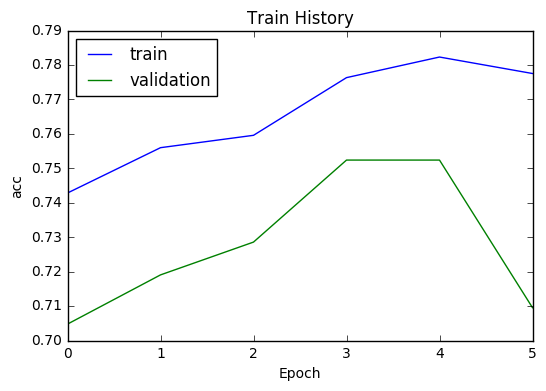

In [89]:
show_train_history(train_history,'acc','val_acc')

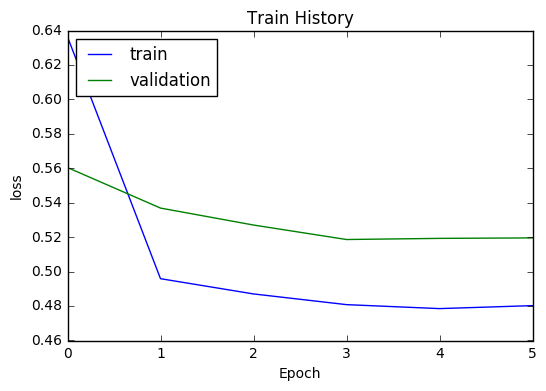

In [90]:
show_train_history(train_history,'loss','val_loss')

In [91]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

262/262 [==============================] - 0s 217us/step


In [92]:
scores[1]

0.7595419842778272